In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def generar_ano(campo):
    campo=str(campo)
    valor=campo[0:-1]
    return int(valor)
def generar_semestre(campo):
    campo=str(campo)
    valor=campo[4:5]
    return int(valor)

In [3]:
datos=pd.read_excel("D:/Universidad/Maestria/Tesis/DATOS/Data_Agrupada_depurada/datos_planteles_agrupada_final.xlsx")

In [4]:
datos

,CANTIDAD_ESTUDIANTES,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,COLE_DEPTO_UBICACION,...,FAMI_SITUACIONECONOMICA_Mejor,FAMI_SITUACIONECONOMICA_Peor,FAMI_TIENECOMPUTADOR_No,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,PERIODO,PUNT_GLOBAL_mean,PUNT_GLOBAL_median,PUNT_GLOBAL_std
0,1,URBANO,N,A,TÉCNICO/ACADÉMICO,105001000621,105001000621,5,5001,ANTIOQUIA,...,0.0,0.0,0,1,0,0,20211,264.000000,264.0,NaN
1,1,URBANO,N,A,TÉCNICO/ACADÉMICO,105001000931,105001000931,5,5001,ANTIOQUIA,...,0.0,0.0,0,0,0,0,20211,273.000000,273.0,NaN
2,1,URBANO,N,A,ACADÉMICO,105001001651,105001001651,5,5001,ANTIOQUIA,...,0.0,0.0,0,1,0,1,20211,332.000000,332.0,NaN
3,1,URBANO,N,A,ACADÉMICO,105001002020,105001002020,5,5001,ANTIOQUIA,...,0.0,1.0,0,1,0,1,20211,242.000000,242.0,NaN
4,1,URBANO,S,A,TÉCNICO/ACADÉMICO,105001002488,105001002046,5,5001,ANTIOQUIA,...,0.0,0.0,0,1,0,1,20211,246.000000,246.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41863,112,RURAL,N,B,TÉCNICO/ACADÉMICO,476248000478,476248000478,76,76248,VALLE,...,NaN,NaN,7,105,9,103,20161,281.098214,276.0,46.001559
41864,20,URBANO,S,B,ACADÉMICO,476520006324,476520006324,76,76520,VALLE,...,NaN,NaN,0,20,0,20,20161,297.450000,292.5,35.704157
41865,123,URBANO,N,B,TÉCNICO,476520007207,476520007207,76,76520,VALLE,...,NaN,NaN,10,113,8,115,20161,269.276423,272.0,41.181983
41866,9,RURAL,S,B,ACADÉMICO,476892099710,476892099710,76,76892,VALLE,...,NaN,NaN,1,8,0,9,20161,355.555556,368.0,39.386264


In [5]:
datos["ANO"]=datos['PERIODO'].apply(lambda text: generar_ano(text))
datos["SEMESTRE"]=datos['PERIODO'].apply(lambda text: generar_semestre(text))

In [6]:
datos[["PERIODO","ANO","SEMESTRE"]]

,PERIODO,ANO,SEMESTRE
0,20211,2021,1
1,20211,2021,1
2,20211,2021,1
3,20211,2021,1
4,20211,2021,1
...,...,...,...
41863,20161,2016,1
41864,20161,2016,1
41865,20161,2016,1
41866,20161,2016,1


In [7]:
data_calendario1=datos[datos['SEMESTRE']==1]
data_calendario2=datos[datos['SEMESTRE']==2]

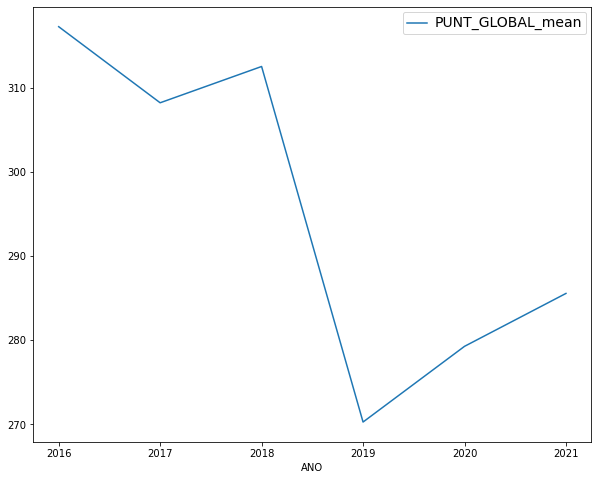

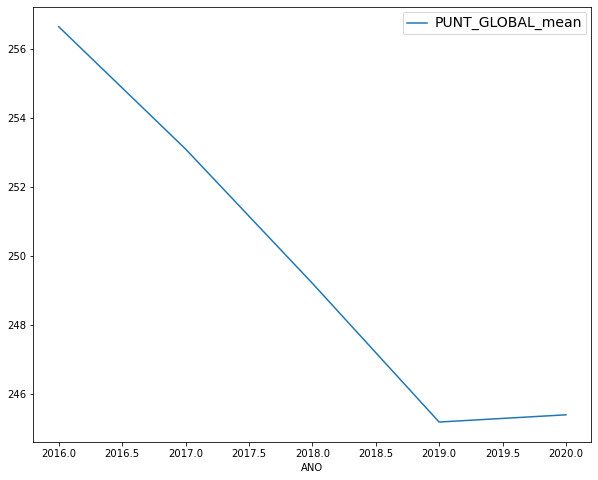

In [8]:
serie_calendario1= data_calendario1.groupby(['ANO'], as_index = False)[['PUNT_GLOBAL_mean']].mean()
serie_calendario1 = serie_calendario1.set_index("ANO")
serie_calendario1[['PUNT_GLOBAL_mean']].plot(figsize=(10, 8), fontsize=10);
legend = plt.legend()
legend.prop.set_size(14);

serie_calendario2= data_calendario2.groupby(['ANO'], as_index = False)[['PUNT_GLOBAL_mean']].mean()
serie_calendario2 = serie_calendario2.set_index("ANO")
serie_calendario2[['PUNT_GLOBAL_mean']].plot(figsize=(10, 8), fontsize=10);
legend = plt.legend()
legend.prop.set_size(14);

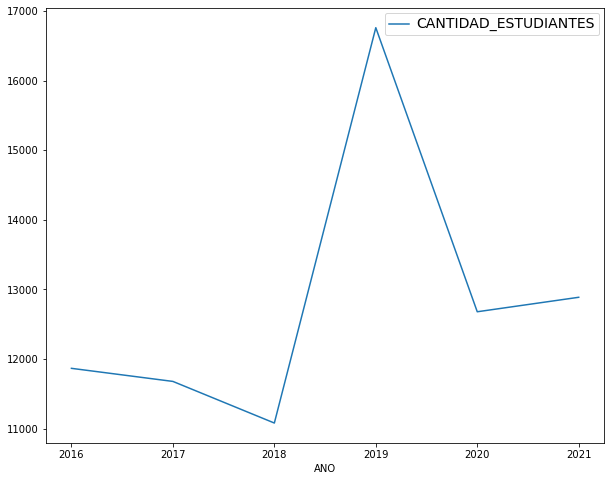

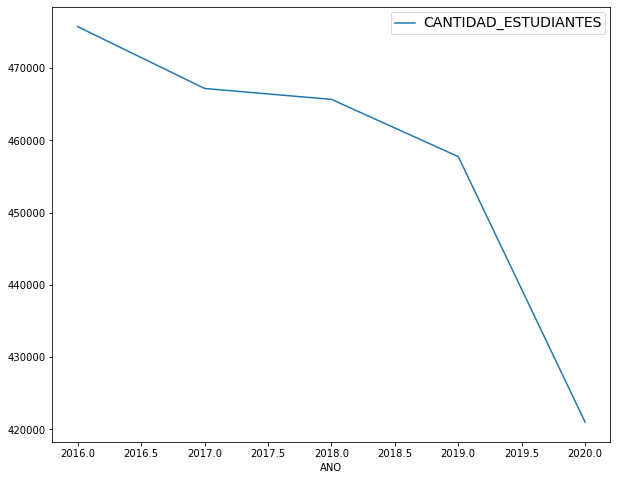

In [9]:
serie_calendario1= data_calendario1.groupby(['ANO'], as_index = False)[['CANTIDAD_ESTUDIANTES']].sum()
serie_calendario1 = serie_calendario1.set_index("ANO")
serie_calendario1[['CANTIDAD_ESTUDIANTES']].plot(figsize=(10, 8), fontsize=10);
legend = plt.legend()
legend.prop.set_size(14);

serie_calendario2= data_calendario2.groupby(['ANO'], as_index = False)[['CANTIDAD_ESTUDIANTES']].sum()
serie_calendario2 = serie_calendario2.set_index("ANO")
serie_calendario2[['CANTIDAD_ESTUDIANTES']].plot(figsize=(10, 8), fontsize=10);
legend = plt.legend()
legend.prop.set_size(14);

# Mayores afectados 
se mostraran los mayores afectados por colegio 

In [10]:
data_calendario_pre_covid2=data_calendario2[data_calendario2['ANO']<2020]
data_calendario_pos_covid2=data_calendario2[data_calendario2['ANO']>=2020]
agrupado_pre2=data_calendario_pre_covid2.groupby(['COLE_COD_DANE_SEDE','COLE_NOMBRE_SEDE'], as_index = False)[['PUNT_GLOBAL_mean']].mean()
agrupado_post2=data_calendario_pos_covid2.groupby(['COLE_COD_DANE_SEDE'], as_index = False)[['PUNT_GLOBAL_mean']].mean()
agrupado_post2=agrupado_post2.rename(columns={'PUNT_GLOBAL_mean': 'PUNT_GLOBAL_pos_covid'})
data_conso_dif2=pd.merge(agrupado_pre2,agrupado_post2,on='COLE_COD_DANE_SEDE')
data_conso_dif2["%DIF"]=1-((data_conso_dif2["PUNT_GLOBAL_pos_covid"])/data_conso_dif2["PUNT_GLOBAL_mean"])

Text(0.5, 0, 'value')

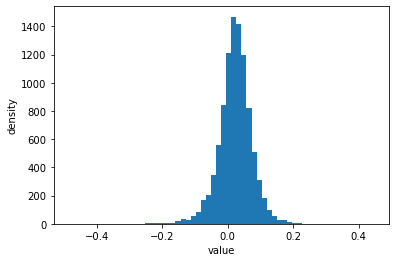

In [11]:
fig, ax1 = plt.subplots() # preparar un gráfico con matplotlib
ax1.hist(data_conso_dif2["%DIF"], 60)
# editar las etiquetas
ax1.set_ylabel('density')
ax1.set_xlabel('value')
# añadir ejes adicionales a la figura
#ax2 = fig.add_axes([left, bottom, right, top])
#ax2.hist(data_conso_dif2["%DIF"])

In [12]:
data_calendario_pre_covid1=data_calendario1[data_calendario1['ANO']<2020]
data_calendario_pos_covid1=data_calendario1[data_calendario1['ANO']>=2020]
agrupado_pre1=data_calendario_pre_covid1.groupby(['COLE_COD_DANE_SEDE','COLE_NOMBRE_SEDE'], as_index = False)[['PUNT_GLOBAL_mean']].mean()
agrupado_post1=data_calendario_pos_covid1.groupby(['COLE_COD_DANE_SEDE'], as_index = False)[['PUNT_GLOBAL_mean']].mean()
agrupado_post1=agrupado_post1.rename(columns={'PUNT_GLOBAL_mean': 'PUNT_GLOBAL_pos_covid'})
data_conso_dif1=pd.merge(agrupado_pre1,agrupado_post1,on='COLE_COD_DANE_SEDE')
data_conso_dif1["%DIF"]=1-((data_conso_dif1["PUNT_GLOBAL_pos_covid"])/data_conso_dif1["PUNT_GLOBAL_mean"])

Text(0.5, 0, 'value')

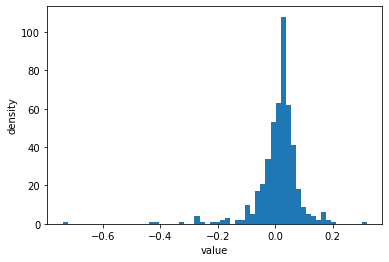

In [13]:
fig, ax1 = plt.subplots() # preparar un gráfico con matplotlib
ax1.hist(data_conso_dif1["%DIF"], 60)
# editar las etiquetas
ax1.set_ylabel('density')
ax1.set_xlabel('value')
# añadir ejes adicionales a la figura
#ax2 = fig.add_axes([left, bottom, right, top])
#ax2.hist(data_conso_dif1["%DIF"])

In [14]:
data_conso_dif2.sort_values(by=["%DIF"], ascending=False)

,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,PUNT_GLOBAL_mean,PUNT_GLOBAL_pos_covid,%DIF
3889,205034000108,C. E. R. LA SOLEDAD,216.755556,120.4,0.444536
9298,376001023918,COLEGIO COMERCIAL MARIA INMACULADA,267.833333,163.0,0.391413
6448,276497000616,POLICARPA SALAVARRIETA,244.500000,150.0,0.386503
9208,373268000861,COL SANTA MARGARITA MARIA,289.000000,180.0,0.377163
6656,305001003904,INST ANTIOQUIA,268.805556,180.5,0.328511
...,...,...,...,...,...
6932,308001009596,COL EL MUNDO DE LOS ESTUDIANTES,224.509375,287.5,-0.280570
3887,205030000081,C. E. R. PUEBLITO DE LOS SANCHEZ,212.222222,272.0,-0.281675
6935,308001010306,COL SAN GABRIEL,197.390247,264.5,-0.339985
4004,205321000071,C. E. R. LA PIEDRA,187.000000,258.0,-0.379679


In [15]:
data_conso_dif1.sort_values(by=["%DIF"], ascending=False)

,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,PUNT_GLOBAL_mean,PUNT_GLOBAL_pos_covid,%DIF
417,376520003479,LIC DEL VALLE,253.583333,172.500000,0.319750
178,318001004077,COLEGIO PEDAGÓGICO DE COLOMBIA - SEDE PRINCIPAL,214.583333,169.000000,0.212427
171,315238001699,COLEGIO NUESTRA SEÑORA DE GUADALUPE,262.200000,210.888889,0.195695
215,325290002151,COL FUND EDUC FUNDETEC,254.000000,208.200000,0.180315
76,311001104760,COL ITEC ...,239.600000,197.000000,0.177796
...,...,...,...,...,...
214,325290002142,COL CENT DE ESTUDIOS HUITAKA,177.000000,226.583333,-0.280132
211,325214047523,INSTITUTO EDUCACIÓN TÉCNICA E INFORMÁTICA INFO...,205.400000,272.833333,-0.328302
403,376275001643,I.E. RAFAEL NUÑEZ - SEDE PRINCIPAL,243.000000,344.000000,-0.415638
235,354001012076,ATLANTIS SYSTEM - SEDE PRINCIPAL,171.000000,244.886364,-0.432084


## Mayores afectados por Municipio

In [105]:
agrupado_pre2=data_calendario_pre_covid2.groupby(['COLE_MCPIO_UBICACION'], as_index = False)[['PUNT_GLOBAL_mean']].mean()
agrupado_post2=data_calendario_pos_covid2.groupby(['COLE_MCPIO_UBICACION'], as_index = False)[['PUNT_GLOBAL_mean']].mean()
agrupado_post2=agrupado_post2.rename(columns={'PUNT_GLOBAL_mean': 'PUNT_GLOBAL_pos_covid'})
data_conso_dif2=pd.merge(agrupado_pre2,agrupado_post2,on='COLE_MCPIO_UBICACION')
data_conso_dif2["%DIF"]=1-((data_conso_dif2["PUNT_GLOBAL_pos_covid"])/data_conso_dif2["PUNT_GLOBAL_mean"])

Text(0.5, 0, 'value')

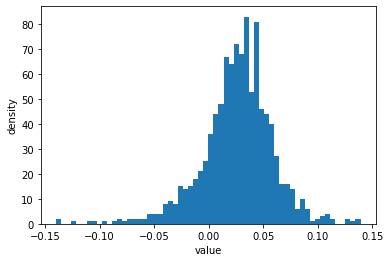

In [106]:
fig, ax1 = plt.subplots()
ax1.hist(data_conso_dif2["%DIF"], 60)
ax1.set_ylabel('density')
ax1.set_xlabel('value')
#ax2.hist(data_conso_dif2["%DIF"])

In [107]:
data_conso_dif2.sort_values(by=["%DIF"], ascending=False)

,COLE_MCPIO_UBICACION,PUNT_GLOBAL_mean,PUNT_GLOBAL_pos_covid,%DIF
42,ANZÁ,284.230769,244.647368,0.139265
530,MONTECRISTO,233.325406,201.080909,0.138195
854,SOLANO,217.302778,188.736710,0.131457
458,LABRANZAGRANDE,249.784787,217.742915,0.128278
768,SAN JUAN DE RIOSECO,245.764706,214.920677,0.125502
...,...,...,...,...
142,CARCASÍ,236.880881,262.053261,-0.106266
237,CURITÍ,235.155900,261.066667,-0.110185
420,LA BELLEZA,245.196498,275.757500,-0.124639
760,SAN JOSÉ DE MIRANDA,251.728836,286.309722,-0.137374


In [108]:
agrupado_pre1=data_calendario_pre_covid1.groupby(['COLE_MCPIO_UBICACION'], as_index = False)[['PUNT_GLOBAL_mean']].mean()
agrupado_post1=data_calendario_pos_covid1.groupby(['COLE_MCPIO_UBICACION'], as_index = False)[['PUNT_GLOBAL_mean']].mean()
agrupado_post1=agrupado_post1.rename(columns={'PUNT_GLOBAL_mean': 'PUNT_GLOBAL_pos_covid'})
data_conso_dif1=pd.merge(agrupado_pre1,agrupado_post1,on='COLE_MCPIO_UBICACION')
data_conso_dif1["%DIF"]=1-((data_conso_dif1["PUNT_GLOBAL_pos_covid"])/data_conso_dif1["PUNT_GLOBAL_mean"])

Text(0.5, 0, 'value')

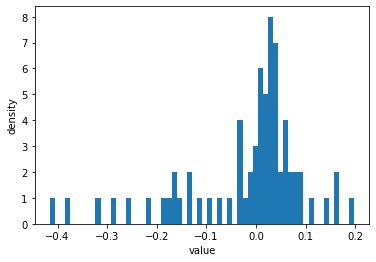

In [109]:
fig, ax1 = plt.subplots()
ax1.hist(data_conso_dif1["%DIF"], 60)
ax1.set_ylabel('density')
ax1.set_xlabel('value')
#ax2.hist(data_conso_dif1["%DIF"])

In [21]:
data_conso_dif1.sort_values(by=["%DIF"], ascending=False)

,COLE_MCPIO_UBICACION,PUNT_GLOBAL_mean,PUNT_GLOBAL_pos_covid,%DIF
55,SAN LUIS DE SINCÉ,214.444444,172.000000,0.197927
63,URUMITA,209.833333,175.000000,0.166005
35,MAGANGUÉ,211.884800,178.500000,0.157561
64,VALLEDUPAR,322.197532,275.206490,0.145845
11,CARTAGENA DE INDIAS,332.463984,296.747496,0.107430
...,...,...,...,...
49,PUERTO ASÍS,196.090909,246.000000,-0.254520
5,BELLO,208.508929,269.000000,-0.290113
3,ARMENIA,205.357143,271.000000,-0.319652
22,ESPINAL,219.000000,302.000000,-0.378995


## Mayores afectados por departamento

In [22]:
agrupado_pre2=data_calendario_pre_covid2.groupby(['COLE_DEPTO_UBICACION'], as_index = False)[['PUNT_GLOBAL_mean']].mean()
agrupado_post2=data_calendario_pos_covid2.groupby(['COLE_DEPTO_UBICACION'], as_index = False)[['PUNT_GLOBAL_mean']].mean()
agrupado_post2=agrupado_post2.rename(columns={'PUNT_GLOBAL_mean': 'PUNT_GLOBAL_pos_covid'})
data_conso_dif2=pd.merge(agrupado_pre2,agrupado_post2,on='COLE_DEPTO_UBICACION')
data_conso_dif2["%DIF"]=1-((data_conso_dif2["PUNT_GLOBAL_pos_covid"])/data_conso_dif2["PUNT_GLOBAL_mean"])

Text(0.5, 17.200000000000003, 'value')

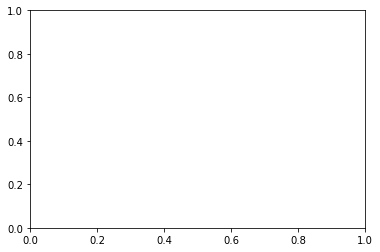

In [23]:
fig, ax2 = plt.subplots()
ax1.hist(data_conso_dif2["%DIF"], 60)
ax1.set_ylabel('density')
ax1.set_xlabel('value')
#ax2.hist(data_conso_dif2["%DIF"])

In [24]:
data_conso_dif2.sort_values(by=["%DIF"], ascending=False)

,COLE_DEPTO_UBICACION,PUNT_GLOBAL_mean,PUNT_GLOBAL_pos_covid,%DIF
31,VAUPES,214.037508,203.811809,0.047775
26,SAN ANDRES,247.150716,236.577798,0.042779
2,ARAUCA,250.893000,241.926483,0.035738
1,ANTIOQUIA,250.770404,242.159356,0.034338
6,BOYACA,261.380003,252.913583,0.032391
32,VICHADA,231.878260,224.391849,0.032286
8,CAQUETA,235.791863,228.494067,0.030950
28,SUCRE,237.469376,230.215900,0.030545
29,TOLIMA,243.355782,236.051803,0.030014
23,PUTUMAYO,235.731502,228.863553,0.029135


In [25]:
agrupado_pre1=data_calendario_pre_covid1.groupby(['COLE_DEPTO_UBICACION'], as_index = False)[['PUNT_GLOBAL_mean']].mean()
agrupado_post1=data_calendario_pos_covid1.groupby(['COLE_DEPTO_UBICACION'], as_index = False)[['PUNT_GLOBAL_mean']].mean()
agrupado_post1=agrupado_post1.rename(columns={'PUNT_GLOBAL_mean': 'PUNT_GLOBAL_pos_covid'})
data_conso_dif1=pd.merge(agrupado_pre1,agrupado_post1,on='COLE_DEPTO_UBICACION')
data_conso_dif1["%DIF"]=1-((data_conso_dif1["PUNT_GLOBAL_pos_covid"])/data_conso_dif1["PUNT_GLOBAL_mean"])

Text(0.5, 0, 'value')

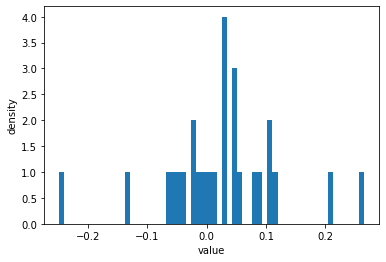

In [26]:
fig, ax1 = plt.subplots()
ax1.hist(data_conso_dif1["%DIF"], 60)
ax1.set_ylabel('density')
ax1.set_xlabel('value')
#ax2.hist(data_conso_dif1["%DIF"])

In [27]:
data_conso_dif1.sort_values(by=["%DIF"], ascending=False)

,COLE_DEPTO_UBICACION,PUNT_GLOBAL_mean,PUNT_GLOBAL_pos_covid,%DIF
13,GUAINIA,225.025000,165.466667,0.264674
24,SUCRE,218.633862,172.000000,0.213297
22,RISARALDA,308.342101,273.229267,0.113876
10,CESAR,285.603309,254.287085,0.109649
4,BOLIVAR,318.076240,283.608886,0.108362
23,SANTANDER,314.967186,286.786956,0.089470
3,BOGOTA,316.169527,291.451501,0.078180
12,CUNDINAMARCA,312.109527,294.006179,0.058003
8,CASANARE,243.500000,231.809524,0.048010
18,NARIÑO,288.530729,274.746962,0.047772


## Diferencia por cantidad de estudiantes

(array([1.400e+01, 4.600e+01, 6.548e+03, 2.632e+03, 9.500e+01, 2.100e+01,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([-144.5,  -94.1,  -43.7,    6.7,   57.1,  107.5,  157.9,  208.3,
         258.7,  309.1,  359.5]),
 <a list of 10 Patch objects>)

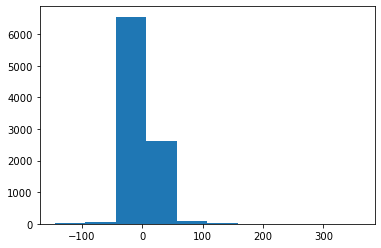

In [28]:
data_calendario_pre_covid2=data_calendario2[data_calendario2['ANO']<2019]
data_calendario_pos_covid2=data_calendario2[data_calendario2['ANO']>=2019]
agrupado_pre2=data_calendario_pre_covid2.groupby(['COLE_COD_DANE_SEDE','COLE_NOMBRE_SEDE'], as_index = False)[['CANTIDAD_ESTUDIANTES']].mean()
agrupado_post2=data_calendario_pos_covid2.groupby(['COLE_COD_DANE_SEDE'], as_index = False)[['CANTIDAD_ESTUDIANTES']].mean()
agrupado_post2=agrupado_post2.rename(columns={'CANTIDAD_ESTUDIANTES': 'PUNT_GLOBAL_pos_covid'})
data_conso_dif2=pd.merge(agrupado_pre2,agrupado_post2,on='COLE_COD_DANE_SEDE')
data_conso_dif2["DIF_ESTU"]=data_conso_dif2["CANTIDAD_ESTUDIANTES"]-data_conso_dif2["PUNT_GLOBAL_pos_covid"]
fig, ax2 = plt.subplots()
ax1.hist(data_conso_dif2["DIF_ESTU"], 100)
ax1.set_ylabel('density')
ax1.set_xlabel('value')
ax2.hist(data_conso_dif2["DIF_ESTU"])

In [29]:
data_conso_dif2.sort_values(by=["DIF_ESTU"], ascending=False)

,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,CANTIDAD_ESTUDIANTES,PUNT_GLOBAL_pos_covid,DIF_ESTU
7450,311001105863,CENT JOHANN KEPLER,615.000000,255.5,359.500000
6880,308001075947,CORP.CENTROREGIONAL(COCERCAS),401.666667,166.0,235.666667
6589,305001005265,COL LATINO,511.000000,282.5,228.500000
2,105001000108,INST EDUC CEFA,930.666667,747.0,183.666667
2363,147001000455,I.E.D FCO DE PAULA SANTANDER,282.000000,128.5,153.500000
...,...,...,...,...,...
2311,144430000014,SEDE ANTONIO NARIÑO,38.000000,158.0,-120.000000
891,111001028207,INST DE BTO INTEGRAL IDIPRON,32.000000,153.5,-121.500000
9122,405001016946,COL COOP SAN ANTONIO DE PRADO (AC),572.333333,694.5,-122.166667
6652,305001022631,CORP ESC EMPRESARIAL DE EDUCACION,179.666667,309.0,-129.333333


(array([  1.,   0.,   0.,   5.,  29., 641., 311.,  29.,   3.,   2.]),
 array([-91.08333333, -75.075     , -59.06666667, -43.05833333,
        -27.05      , -11.04166667,   4.96666667,  20.975     ,
         36.98333333,  52.99166667,  69.        ]),
 <a list of 10 Patch objects>)

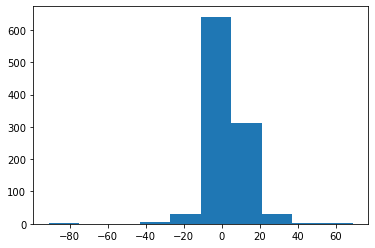

In [30]:
data_calendario_pre_covid2=data_calendario2[data_calendario2['ANO']<2019]
data_calendario_pos_covid2=data_calendario2[data_calendario2['ANO']>=2019]
agrupado_pre2=data_calendario_pre_covid2.groupby(['COLE_MCPIO_UBICACION'], as_index = False)[['CANTIDAD_ESTUDIANTES']].mean()
agrupado_post2=data_calendario_pos_covid2.groupby(['COLE_MCPIO_UBICACION'], as_index = False)[['CANTIDAD_ESTUDIANTES']].mean()
agrupado_post2=agrupado_post2.rename(columns={'CANTIDAD_ESTUDIANTES': 'PUNT_GLOBAL_pos_covid'})
data_conso_dif2=pd.merge(agrupado_pre2,agrupado_post2,on='COLE_MCPIO_UBICACION')
data_conso_dif2["DIF_ESTU"]=data_conso_dif2["CANTIDAD_ESTUDIANTES"]-data_conso_dif2["PUNT_GLOBAL_pos_covid"]
fig, ax2 = plt.subplots()
ax1.hist(data_conso_dif2["DIF_ESTU"], 100)
ax1.set_ylabel('density')
ax1.set_xlabel('value')
ax2.hist(data_conso_dif2["DIF_ESTU"])

In [31]:
data_conso_dif2.sort_values(by=["DIF_ESTU"], ascending=False)

,COLE_MCPIO_UBICACION,CANTIDAD_ESTUDIANTES,PUNT_GLOBAL_pos_covid,DIF_ESTU
368,GUATAPÉ,124.000000,55.000000,69.000000
1011,ZARAGOZA,116.625000,47.875000,68.750000
583,PAICOL,107.333333,67.666667,39.666667
545,MUZO,82.000000,42.500000,39.500000
117,CAICEDO,108.333333,71.000000,37.333333
...,...,...,...,...
139,CAPITANEJO,40.166667,68.000000,-27.833333
158,CERRITO,43.333333,76.500000,-33.166667
268,EL CASTILLO,68.333333,101.500000,-33.166667
843,SIMIJACA,59.000000,95.000000,-36.000000


(array([ 1.,  0.,  0.,  4., 13.,  7.,  4.,  2.,  1.,  1.]),
 array([-7.2       , -5.13670996, -3.07341991, -1.01012987,  1.05316017,
         3.11645022,  5.17974026,  7.2430303 ,  9.30632035, 11.36961039,
        13.43290043]),
 <a list of 10 Patch objects>)

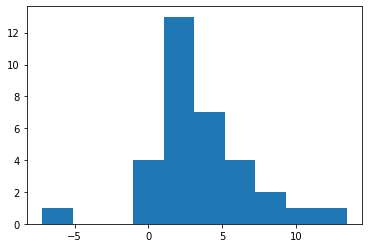

In [32]:
data_calendario_pre_covid2=data_calendario2[data_calendario2['ANO']<2019]
data_calendario_pos_covid2=data_calendario2[data_calendario2['ANO']>=2019]
agrupado_pre2=data_calendario_pre_covid2.groupby(['COLE_DEPTO_UBICACION'], as_index = False)[['CANTIDAD_ESTUDIANTES']].mean()
agrupado_post2=data_calendario_pos_covid2.groupby(['COLE_DEPTO_UBICACION'], as_index = False)[['CANTIDAD_ESTUDIANTES']].mean()
agrupado_post2=agrupado_post2.rename(columns={'CANTIDAD_ESTUDIANTES': 'PUNT_GLOBAL_pos_covid'})
data_conso_dif2=pd.merge(agrupado_pre2,agrupado_post2,on='COLE_DEPTO_UBICACION')
data_conso_dif2["DIF_ESTU"]=data_conso_dif2["CANTIDAD_ESTUDIANTES"]-data_conso_dif2["PUNT_GLOBAL_pos_covid"]
fig, ax2 = plt.subplots()
ax1.hist(data_conso_dif2["DIF_ESTU"], 100)
ax1.set_ylabel('density')
ax1.set_xlabel('value')
ax2.hist(data_conso_dif2["DIF_ESTU"])

In [33]:
data_conso_dif2.sort_values(by=["DIF_ESTU"], ascending=False)

,COLE_DEPTO_UBICACION,CANTIDAD_ESTUDIANTES,PUNT_GLOBAL_pos_covid,DIF_ESTU
0,AMAZONAS,66.909091,53.476190,13.432900
24,QUINDIO,73.473684,62.405714,11.067970
25,RISARALDA,59.972917,51.821958,8.150958
4,BOGOTA,78.985906,71.424488,7.561418
23,PUTUMAYO,51.848889,44.818792,7.030097
17,HUILA,59.418487,53.372152,6.046335
1,ANTIOQUIA,67.622042,61.651454,5.970587
30,VALLE,58.129834,52.825553,5.304281
19,MAGDALENA,59.177083,54.844156,4.332927
8,CAQUETA,48.573913,44.500000,4.073913


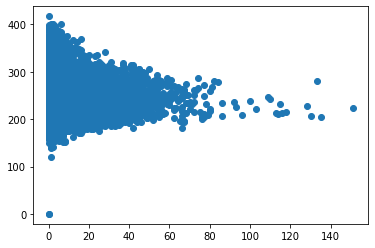

In [34]:
fig, ax = plt.subplots()
ax.scatter(datos['ESTU_DEDICACIONINTERNET_30 minutos o menos'],datos['PUNT_GLOBAL_mean'])
plt.show()

In [36]:
np.corrcoef(datos_vector['ESTU_DEDICACIONINTERNET_30 minutos o menos'],datos_vector['PUNT_GLOBAL_mean'])

NameError: name 'datos_vector' is not defined

Text(0.5, 0, 'value')

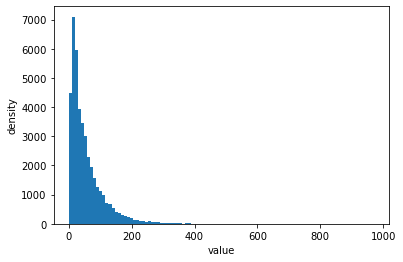

In [37]:
fig, ax1 = plt.subplots()
ax1.hist(datos["CANTIDAD_ESTUDIANTES"], 100)
ax1.set_ylabel('density')
ax1.set_xlabel('value')
#ax1.hist(datos["CANTIDAD_ESTUDIANTES"])

In [38]:
datos_vector=pd.read_excel("D:/Universidad/Maestria/Tesis/DATOS/Data_Agrupada_depurada/datos_imputados.xlsx")

In [39]:
datos_vector.columns

Index(['Unnamed: 0', 'CANTIDAD_ESTUDIANTES', 'COLE_AREA_UBICACION',
       'COLE_BILINGUE', 'COLE_CALENDARIO', 'COLE_CARACTER', 'COLE_GENERO',
       'COLE_NATURALEZA', 'COLE_SEDE_PRINCIPAL',
       'ESTU_DEDICACIONINTERNET_30 minutos o menos',
       'ESTU_DEDICACIONINTERNET_Entre 1 y 3 horas',
       'ESTU_DEDICACIONINTERNET_Entre 30 y 60 minutos',
       'ESTU_DEDICACIONINTERNET_Más de 3 horas',
       'ESTU_DEDICACIONINTERNET_No Navega Internet',
       'ESTU_DEDICACIONLECTURADIARIA_30 minutos o menos',
       'ESTU_DEDICACIONLECTURADIARIA_Entre 1 y 2 horas',
       'ESTU_DEDICACIONLECTURADIARIA_Entre 30 y 60 minutos',
       'ESTU_DEDICACIONLECTURADIARIA_Más de 2 horas',
       'ESTU_DEDICACIONLECTURADIARIA_No leo por entretenimiento',
       'ESTU_GENERO_F', 'ESTU_GENERO_M', 'ESTU_TIENEETNIA_No',
       'ESTU_TIENEETNIA_Si',
       'FAMI_EDUCACIONMADRE_Educación profesional completa',
       'FAMI_EDUCACIONMADRE_Educación profesional incompleta',
       'FAMI_EDUCACIONMADRE_Ningu

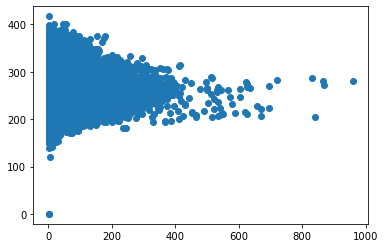

In [40]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['CANTIDAD_ESTUDIANTES'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()

In [41]:
np.corrcoef(datos_vector['CANTIDAD_ESTUDIANTES'],datos_vector['PUNT_GLOBAL_mean'])

array([[1.       , 0.0843744],
       [0.0843744, 1.       ]])

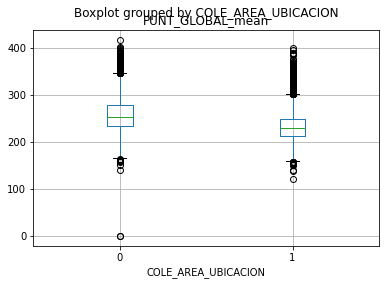

In [42]:
boxplot = datos_vector.boxplot(column=['PUNT_GLOBAL_mean'] , by='COLE_AREA_UBICACION')

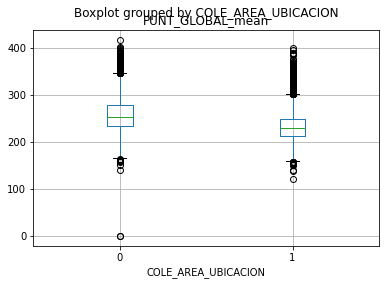

In [43]:
boxplot = datos_vector.boxplot(column=['PUNT_GLOBAL_mean'] , by='COLE_AREA_UBICACION')

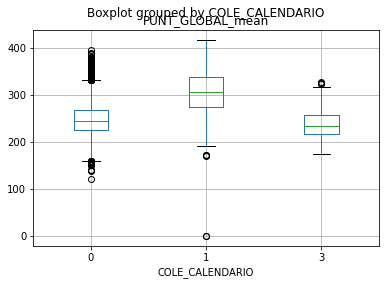

In [44]:
boxplot = datos_vector.boxplot(column=['PUNT_GLOBAL_mean'] , by='COLE_CALENDARIO')

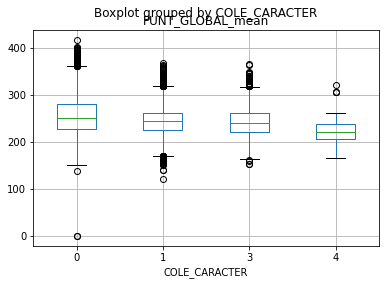

In [45]:
boxplot = datos_vector.boxplot(column=['PUNT_GLOBAL_mean'] , by='COLE_CARACTER')

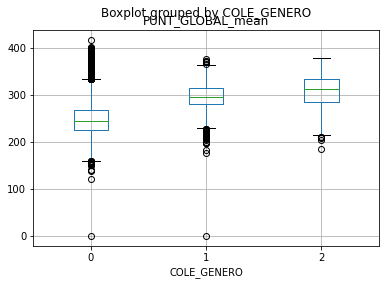

In [46]:
boxplot = datos_vector.boxplot(column=['PUNT_GLOBAL_mean'] , by='COLE_GENERO')

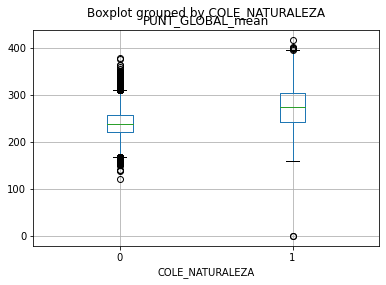

In [47]:
boxplot = datos_vector.boxplot(column=['PUNT_GLOBAL_mean'] , by='COLE_NATURALEZA')

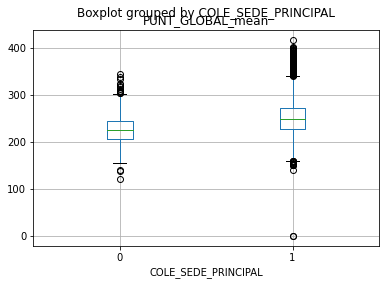

In [48]:
boxplot = datos_vector.boxplot(column=['PUNT_GLOBAL_mean'] , by='COLE_SEDE_PRINCIPAL')

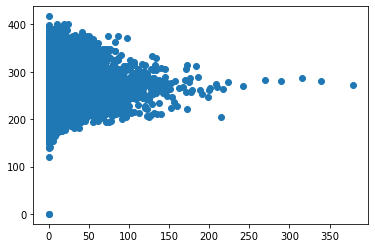

In [49]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['ESTU_DEDICACIONINTERNET_Entre 1 y 3 horas'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()

In [50]:
np.corrcoef(datos_vector['ESTU_DEDICACIONINTERNET_Entre 1 y 3 horas'],datos_vector['PUNT_GLOBAL_mean'])

array([[1.        , 0.23011357],
       [0.23011357, 1.        ]])

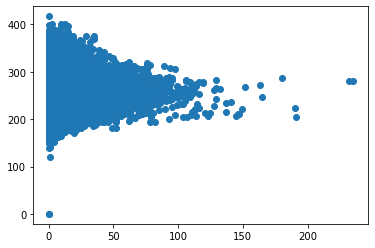

In [51]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['ESTU_DEDICACIONINTERNET_Entre 30 y 60 minutos'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()

In [52]:
np.corrcoef(datos_vector['ESTU_DEDICACIONINTERNET_Entre 30 y 60 minutos'],datos_vector['PUNT_GLOBAL_mean'])

array([[1.        , 0.02067903],
       [0.02067903, 1.        ]])

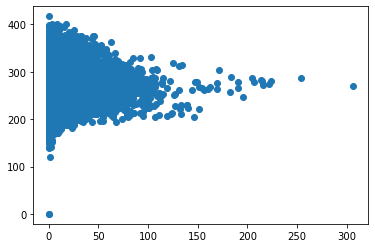

In [53]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['ESTU_DEDICACIONINTERNET_Más de 3 horas'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()

In [54]:
np.corrcoef(datos_vector['ESTU_DEDICACIONINTERNET_Más de 3 horas'],datos_vector['PUNT_GLOBAL_mean'])

array([[1.        , 0.24194801],
       [0.24194801, 1.        ]])

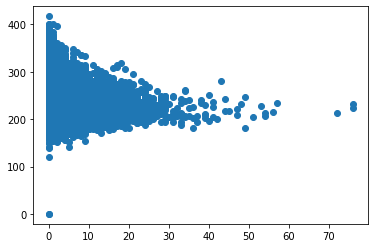

In [55]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['ESTU_DEDICACIONINTERNET_No Navega Internet'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()

In [56]:
np.corrcoef(datos_vector['ESTU_DEDICACIONINTERNET_No Navega Internet'],datos_vector['PUNT_GLOBAL_mean'])

array([[ 1.       , -0.2951348],
       [-0.2951348,  1.       ]])

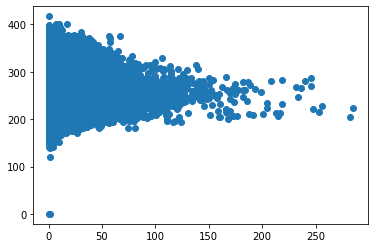

In [57]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['ESTU_DEDICACIONLECTURADIARIA_30 minutos o menos'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()

In [58]:
np.corrcoef(datos_vector['ESTU_DEDICACIONLECTURADIARIA_30 minutos o menos'],datos_vector['PUNT_GLOBAL_mean'])

array([[1.        , 0.02242691],
       [0.02242691, 1.        ]])

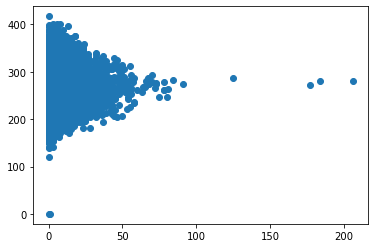

In [59]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['ESTU_DEDICACIONLECTURADIARIA_Entre 1 y 2 horas'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()

In [60]:
np.corrcoef(datos_vector['ESTU_DEDICACIONLECTURADIARIA_Entre 1 y 2 horas'],datos_vector['PUNT_GLOBAL_mean'])

array([[1.        , 0.16823077],
       [0.16823077, 1.        ]])

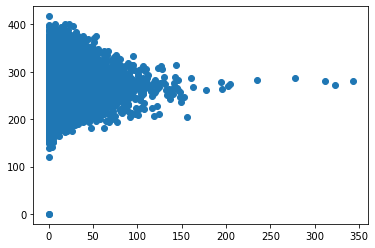

In [61]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['ESTU_DEDICACIONLECTURADIARIA_Entre 30 y 60 minutos'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()

In [62]:
np.corrcoef(datos_vector['ESTU_DEDICACIONLECTURADIARIA_Entre 30 y 60 minutos'],datos_vector['PUNT_GLOBAL_mean'])

array([[1.        , 0.17275976],
       [0.17275976, 1.        ]])

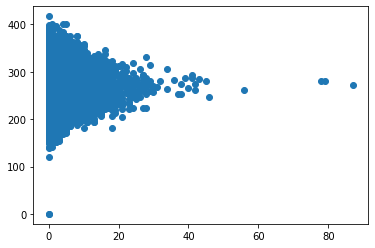

In [63]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['ESTU_DEDICACIONLECTURADIARIA_Más de 2 horas'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()

In [64]:
np.corrcoef(datos_vector['ESTU_DEDICACIONLECTURADIARIA_Más de 2 horas'],datos_vector['PUNT_GLOBAL_mean'])

array([[1.        , 0.16763563],
       [0.16763563, 1.        ]])

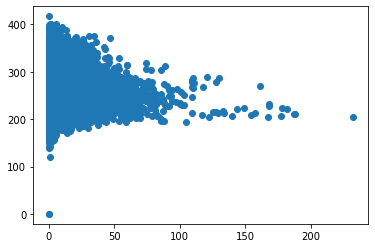

In [65]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['ESTU_DEDICACIONLECTURADIARIA_No leo por entretenimiento'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()

In [66]:
np.corrcoef(datos_vector['ESTU_DEDICACIONLECTURADIARIA_No leo por entretenimiento'],datos_vector['PUNT_GLOBAL_mean'])

array([[1.        , 0.04588411],
       [0.04588411, 1.        ]])

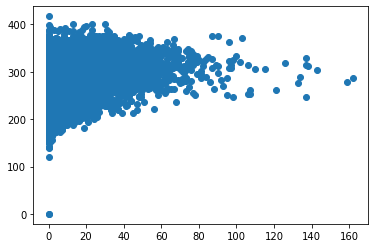

In [67]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_EDUCACIONMADRE_Educación profesional completa'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()

In [68]:
np.corrcoef(datos_vector['FAMI_EDUCACIONMADRE_Educación profesional completa'],datos_vector['PUNT_GLOBAL_mean'])

array([[1.        , 0.50464154],
       [0.50464154, 1.        ]])

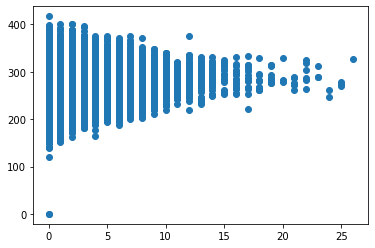

In [69]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_EDUCACIONMADRE_Educación profesional incompleta'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()

In [70]:
np.corrcoef(datos_vector['FAMI_EDUCACIONMADRE_Educación profesional incompleta'],datos_vector['PUNT_GLOBAL_mean'])

array([[1.        , 0.34450535],
       [0.34450535, 1.        ]])

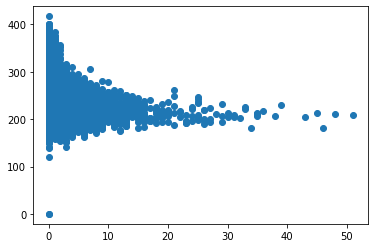

In [71]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_EDUCACIONMADRE_Ninguno'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()

In [72]:
np.corrcoef(datos_vector['FAMI_EDUCACIONMADRE_Ninguno'],datos_vector['PUNT_GLOBAL_mean'])

array([[ 1.        , -0.29883855],
       [-0.29883855,  1.        ]])

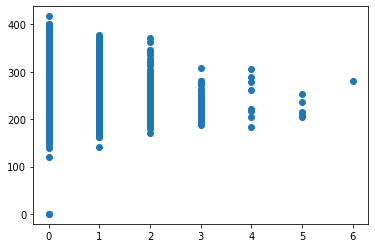

array([[ 1.       , -0.0291041],
       [-0.0291041,  1.       ]])

In [73]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_EDUCACIONMADRE_No Aplica'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_EDUCACIONMADRE_No Aplica'],datos_vector['PUNT_GLOBAL_mean'])

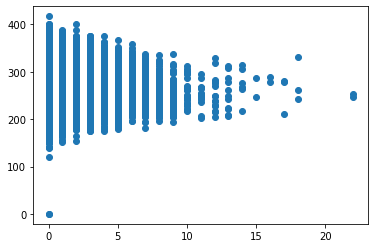

array([[1.        , 0.11840972],
       [0.11840972, 1.        ]])

In [74]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_EDUCACIONMADRE_No sabe'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_EDUCACIONMADRE_No sabe'],datos_vector['PUNT_GLOBAL_mean'])

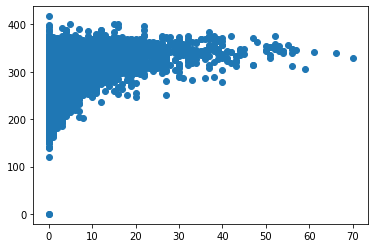

array([[1.        , 0.52644455],
       [0.52644455, 1.        ]])

In [75]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_EDUCACIONMADRE_Postgrado'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_EDUCACIONMADRE_Postgrado'],datos_vector['PUNT_GLOBAL_mean'])

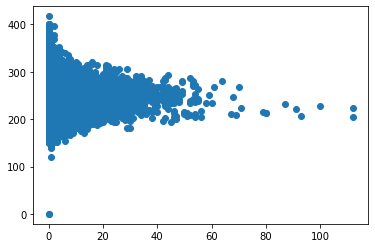

array([[ 1.        , -0.17854736],
       [-0.17854736,  1.        ]])

In [76]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_EDUCACIONMADRE_Primaria completa'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_EDUCACIONMADRE_Primaria completa'],datos_vector['PUNT_GLOBAL_mean'])

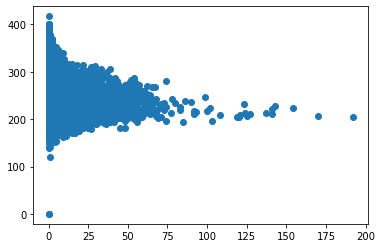

array([[ 1.        , -0.26443406],
       [-0.26443406,  1.        ]])

In [77]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_EDUCACIONMADRE_Primaria incompleta'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_EDUCACIONMADRE_Primaria incompleta'],datos_vector['PUNT_GLOBAL_mean'])

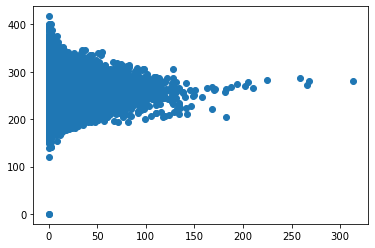

array([[1.        , 0.03464031],
       [0.03464031, 1.        ]])

In [78]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa'],datos_vector['PUNT_GLOBAL_mean'])

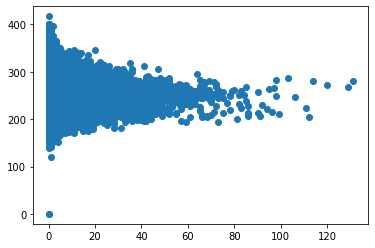

array([[ 1.        , -0.09891596],
       [-0.09891596,  1.        ]])

In [79]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta'],datos_vector['PUNT_GLOBAL_mean'])

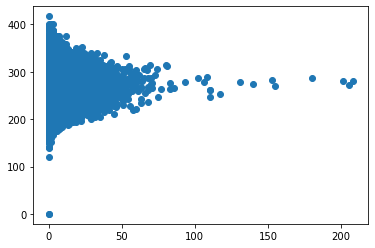

array([[1.        , 0.20485962],
       [0.20485962, 1.        ]])

In [80]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_EDUCACIONMADRE_Técnica o tecnológica completa'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_EDUCACIONMADRE_Técnica o tecnológica completa'],datos_vector['PUNT_GLOBAL_mean'])

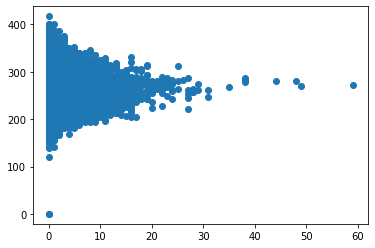

array([[1.        , 0.13696293],
       [0.13696293, 1.        ]])

In [81]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta'],datos_vector['PUNT_GLOBAL_mean'])

In [83]:
fig, ax = plt.subplots()
    ax.scatter(datos_vector['FAMI_EDUCACIONPADRE_Educación profesional completa'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_EDUCACIONPADRE_Educación profesional completa'],datos_vector['PUNT_GLOBAL_mean'])

IndentationError: unexpected indent (<ipython-input-83-a04daede187c>, line 2)

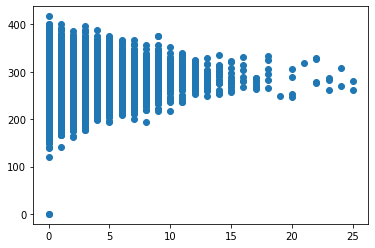

array([[1.        , 0.33777327],
       [0.33777327, 1.        ]])

In [84]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_EDUCACIONPADRE_Educación profesional incompleta'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_EDUCACIONPADRE_Educación profesional incompleta'],datos_vector['PUNT_GLOBAL_mean'])

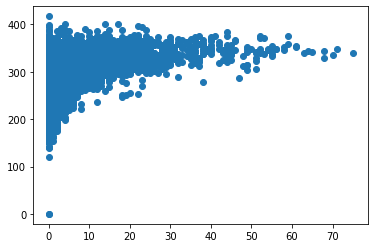

array([[1.        , 0.50831631],
       [0.50831631, 1.        ]])

In [85]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_EDUCACIONPADRE_Postgrado'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_EDUCACIONPADRE_Postgrado'],datos_vector['PUNT_GLOBAL_mean'])

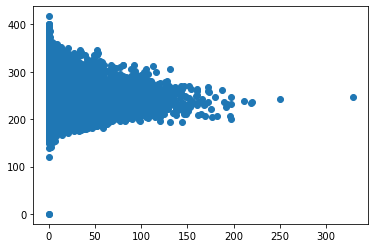

array([[ 1.        , -0.21303246],
       [-0.21303246,  1.        ]])

In [86]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_ESTRATOVIVIENDA_Estrato 1'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_ESTRATOVIVIENDA_Estrato 1'],datos_vector['PUNT_GLOBAL_mean'])

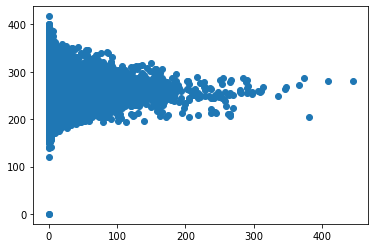

array([[1.        , 0.04229175],
       [0.04229175, 1.        ]])

In [87]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_ESTRATOVIVIENDA_Estrato 2'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_ESTRATOVIVIENDA_Estrato 2'],datos_vector['PUNT_GLOBAL_mean'])

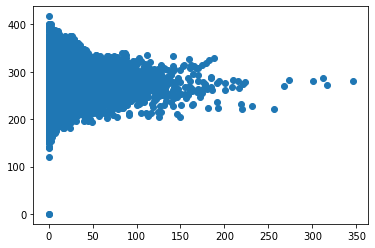

array([[1.        , 0.25213053],
       [0.25213053, 1.        ]])

In [88]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_ESTRATOVIVIENDA_Estrato 3'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_ESTRATOVIVIENDA_Estrato 3'],datos_vector['PUNT_GLOBAL_mean'])

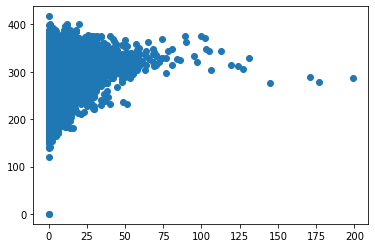

array([[1.        , 0.40147041],
       [0.40147041, 1.        ]])

In [89]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_ESTRATOVIVIENDA_Estrato 4'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_ESTRATOVIVIENDA_Estrato 4'],datos_vector['PUNT_GLOBAL_mean'])

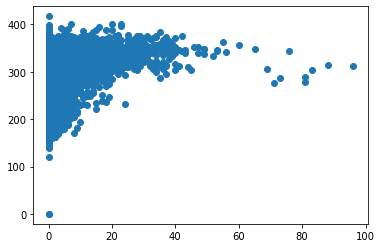

array([[1.        , 0.37772949],
       [0.37772949, 1.        ]])

In [90]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_ESTRATOVIVIENDA_Estrato 5'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_ESTRATOVIVIENDA_Estrato 5'],datos_vector['PUNT_GLOBAL_mean'])

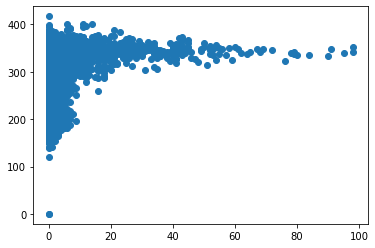

array([[1.        , 0.28101931],
       [0.28101931, 1.        ]])

In [91]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_ESTRATOVIVIENDA_Estrato 6'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_ESTRATOVIVIENDA_Estrato 6'],datos_vector['PUNT_GLOBAL_mean'])

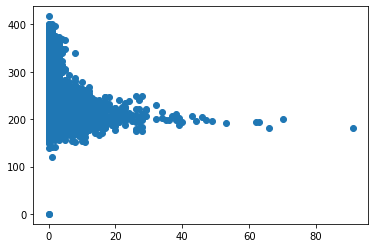

array([[ 1.        , -0.34236317],
       [-0.34236317,  1.        ]])

In [92]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_ESTRATOVIVIENDA_Sin Estrato'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_ESTRATOVIVIENDA_Sin Estrato'],datos_vector['PUNT_GLOBAL_mean'])

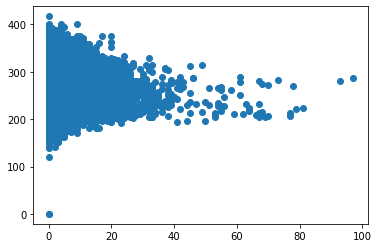

array([[1.        , 0.09400653],
       [0.09400653, 1.        ]])

In [93]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_PERSONASHOGAR_1 a 2'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_PERSONASHOGAR_1 a 2'],datos_vector['PUNT_GLOBAL_mean'])

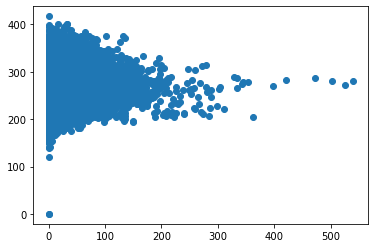

array([[1.        , 0.21336218],
       [0.21336218, 1.        ]])

In [94]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_PERSONASHOGAR_3 a 4'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_PERSONASHOGAR_3 a 4'],datos_vector['PUNT_GLOBAL_mean'])

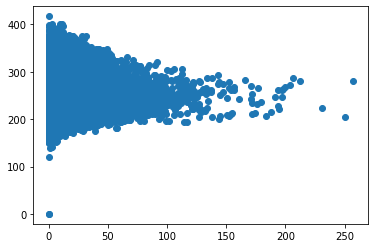

array([[ 1.00000000e+00, -8.41882429e-04],
       [-8.41882429e-04,  1.00000000e+00]])

In [95]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_PERSONASHOGAR_5 a 6'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_PERSONASHOGAR_5 a 6'],datos_vector['PUNT_GLOBAL_mean'])

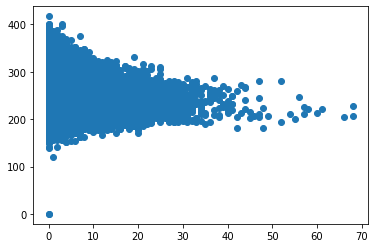

array([[ 1.        , -0.19120194],
       [-0.19120194,  1.        ]])

In [96]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_PERSONASHOGAR_7 a 8'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_PERSONASHOGAR_7 a 8'],datos_vector['PUNT_GLOBAL_mean'])

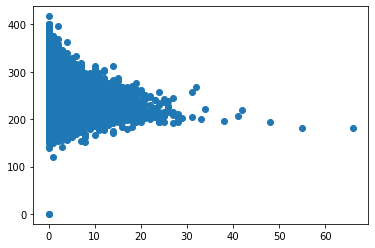

array([[ 1.       , -0.2029559],
       [-0.2029559,  1.       ]])

In [97]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_PERSONASHOGAR_9 o más'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_PERSONASHOGAR_9 o más'],datos_vector['PUNT_GLOBAL_mean'])

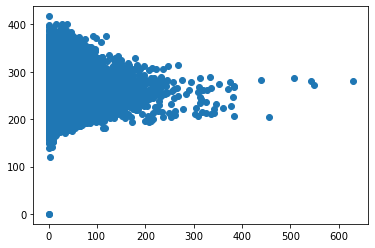

array([[1.        , 0.09514352],
       [0.09514352, 1.        ]])

In [98]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_SITUACIONECONOMICA_Igual'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_SITUACIONECONOMICA_Igual'],datos_vector['PUNT_GLOBAL_mean'])

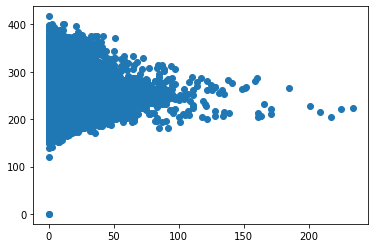

array([[1.        , 0.04415285],
       [0.04415285, 1.        ]])

In [99]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_SITUACIONECONOMICA_Mejor'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_SITUACIONECONOMICA_Mejor'],datos_vector['PUNT_GLOBAL_mean'])

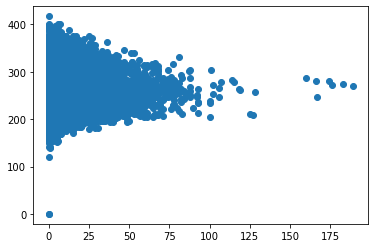

array([[1.        , 0.11025504],
       [0.11025504, 1.        ]])

In [100]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_SITUACIONECONOMICA_Peor'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_SITUACIONECONOMICA_Peor'],datos_vector['PUNT_GLOBAL_mean'])

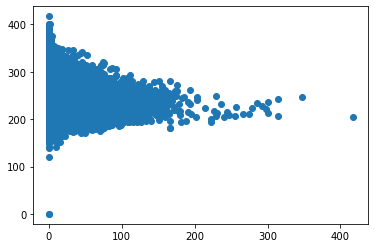

array([[ 1.        , -0.27828467],
       [-0.27828467,  1.        ]])

In [101]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_TIENECOMPUTADOR_No'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_TIENECOMPUTADOR_No'],datos_vector['PUNT_GLOBAL_mean'])

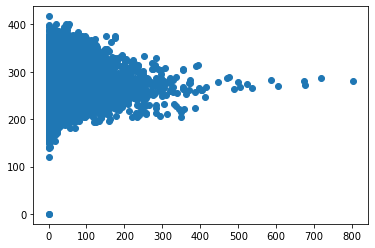

array([[1.        , 0.29799016],
       [0.29799016, 1.        ]])

In [102]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_TIENECOMPUTADOR_Si'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_TIENECOMPUTADOR_Si'],datos_vector['PUNT_GLOBAL_mean'])

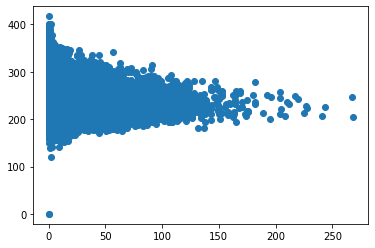

array([[ 1.        , -0.29093867],
       [-0.29093867,  1.        ]])

In [103]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_TIENEINTERNET_No'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_TIENEINTERNET_No'],datos_vector['PUNT_GLOBAL_mean'])

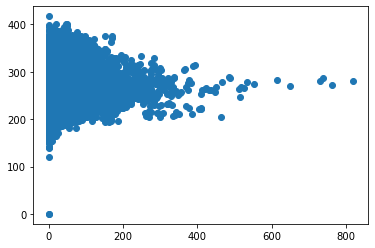

array([[1.        , 0.27680033],
       [0.27680033, 1.        ]])

In [104]:
fig, ax = plt.subplots()
ax.scatter(datos_vector['FAMI_TIENEINTERNET_Si'],datos_vector['PUNT_GLOBAL_mean'])
plt.show()
np.corrcoef(datos_vector['FAMI_TIENEINTERNET_Si'],datos_vector['PUNT_GLOBAL_mean'])